In [314]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import ode


**Integrator**

In [476]:
# See Wk11_ODESystems.pdf
#plot in phase space = plot against one another
def integrator(dx, dy, t_interval, initial_conditions):
    def vdp1(t, y):
        a = 0.15
        k = 8
        eps0 = 0.002
        mu1 = 0.2
        mu2 = 0.3


        n = len(y)
        dydt = np.zeros((n, 1))
    #     dydt[0] = y[1]
    #     dydt[0] = h
#         dydt[0] = -k*v*(v-a)*(v-1) - v*h
        dydt[0] = dx(y[0], y[1])
        dydt[1] = dy(y[0], y[1])
    #     dydt[1] = (1 - y[0]**2)*y[1] - y[0]
    #     dydt[1] = (1 - v**2)*h - v
#         dydt[1] = (eps0 + (mu1 * h) / (v + mu2)) * ((-h) - k * v * (v - a -1))
        return dydt

    # t0, t1 = 0, 20 #start and end
    t0, t1 = t_interval[0], t_interval[1]
#     print(t1)
    t = np.linspace(t0, t1+1, 100) # points of evaluation of solution
    # y0 = [2,0] # initial value
    y0 = initial_conditions

#     y = np.zeros((len(t), len(y0))) #array for solution
    y = np.zeros((len(t), 1))
    x = np.zeros((len(t), 1))
    
#     y[0,:] = y0
    y[0] = y0[1]
    x[0] = y0[0]
    
    # dopri5" Imitates MATLAB's ode45 function (uses Runge-Kutta 4, 5)
    r = integrate.ode(vdp1).set_integrator("dopri5", method="bdf")  # choice of method
    r.set_initial_value(y0, t0)   # initial values
#     for i in range(1, t.size):
#         y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
#         if not r.successful():
#             raise RuntimeError("Could not integrate")
        # Integrate the ODE(s) across each delta_t timestep
    k = 1
    delta_t = 0.2
    while r.successful() and k < t.size:
        r.integrate(r.t + delta_t)

        # Store the results to plot later
        t[k] = r.t
        x[k] = r.y[0]
        y[k] = r.y[1]
        k += 1
#     print(y)
#     plt.plot(t, y)
#     plt.show()
    return x, y, t

**Plotting Functions**

In [477]:
def flow(x_interval, y_interval, dx, dy, labels, xstep=1, ystep=1, integrate = False, initial_conditions=None, soln_label = None):
# close all; clear all; 
    # % This Matlab code generates a vector field for the system of ODEs 
    # % dx/dt = f(x,y), dy/dt = g(x,y)

    # % This code currently will find the vector field for the EXAMPLE problem
    # %           dx/dt = a*x2
    # %           dy/dt = -x1
    # %--------------------------------------------------------------------------
    # %        THIS IS NOT THE PROBLEM YOU ARE SOLVING FOR PROJECT 3!
    # % (Make any necessary adjustments to this code so that it generates the 
    # % vector field for the Project 3 system of equations.)
    # %--------------------------------------------------------------------------


    # % Set the axis limits
#     xmin = -5; xmax = 5; ymin = -5; ymax = 5;

    # %set step size for x and y;
#     xstep = 1; ystep = 1; 
    xmin = x_interval[0]
    xmax = x_interval[1]
    
    ymin = y_interval[0]
    ymax = y_interval[1]
    
    x = np.arange(xmin, xmax+1, xstep)
    y = np.arange(ymin, ymax+1, ystep)
    # x = np.arange(xmin, xmax+1)
    # y = np.arange(ymin, ymax+1)

    # %generate mesh for plotting
    [x, y] = np.meshgrid(x, y);


#     # %set parameter values 
#     a = 1; 
    if integrate:
        if initial_conditions is None:
            raise ValueError("Expected initial conditions")
        else:
            x_sol, y_sol, _ = integrator(dx, dy, x_interval, initial_conditions)
            plt.plot(x_sol, y_sol, label=soln_label)

#     # % Define the system of equations 
    dx = dx(x, y);  
    dy = dy(x, y); 

    # %normalize vectors (to help plotting)
    dx = np.divide(dx, np.sqrt(np.power(dx, 2) + np.power(dy, 2))); 
    dy = np.divide(dy, np.sqrt(np.power(dx, 2) + np.power(dy, 2))); 
    dx = np.nan_to_num(dx)
    dy = np.nan_to_num(dy)

    # % Generate the vector field

    plt.quiver(x, y, dx,dy)
        
    
    # %change axes limits, add labels
    # axis([xmin, xmax, ymin, ymax])
    plt.xlim((xmin-0.05, xmax+0.05))
    plt.ylim((ymin-0.05, ymax+0.05))
    plt.title(labels[2])
    plt.xlabel('${}$'.format(labels[0]))
    plt.ylabel('${}$'.format(labels[1]))
    if soln_label is not None:
        plt.legend()
    # LEGEND!!!!!!!

def plot_nullclines(xmin, xmax, ymin, ymax, x_nullclines, y_nullclines, colors, labels):
    #takes in mins, maxes, list of nullclines, list of colors, labels
    
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)

    c = 0 # iterator for colors
    for i in range(len(x_nullclines)):
        plt.plot(x_nullclines[i](y), y, colors[c])
        c+=1
    
    for i in range(len(y_nullclines)):
        plt.plot(x, y_nullclines[i](x), colors[c])
        c+=1
    
    
#     plt.legend()

    # Fill between: 
#     plt.fill_between(x, y1, y2)
    plt.fill_between(x, y_nullclines[0](x), y_nullclines[2](x), alpha=0.2,color="steelblue", label="Northwest")
    plt.fill_between(x, y_nullclines[1](x), y_nullclines[2](x), alpha=0.2, color="purple", label="Northeast")
    # fill between upper parabola and ymax
    xlim = np.array([i for i in x if i > 0])

    plt.fill_between(xlim, y_nullclines[0](xlim), ymax, alpha=0.2, color="green", label="Southwest")
    
    plt.legend()
    plt.xlim((xmin - 0.1, xmax))
    plt.ylim((ymin - 0.2, ymax))
    plt.xlabel('${}$'.format(labels[0]))
    plt.ylabel('${}$'.format(labels[1]))
    
    
    

In [478]:
# # Example problem:
# xmin = -5; xmax = 5; ymin = -5; ymax = 5;
# a = 1; 

# # % Define the system of equations 
# def dx(x, y, a=1):
#     return a*y;  
# def dy(x, y):
#     return -x; 


# flow(xmin, xmax, ymin, ymax, dx, dy, ['x', 'y'])

**3.1**

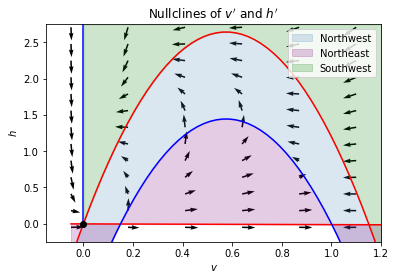

In [479]:
a = 0.15
k = 8
eps0 = 0.002
mu1 = 0.2
mu2 = 0.3

v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]

labels = ['v', 'h', 'Nullclines of $v\'$ and $h\'$']

def dvdt(v, h, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -k*v*(v-a)*(v-1) - v*h
def dhdt(v, h, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return (eps0 + (mu1 * h) / (v + mu2)) * ((-h) - k * v * (v - a -1))


def nullv_1(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return np.zeros(len(v))
def nullv_2(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -k * (v-a)*(v-1)

def nullh_1(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -k*v*(v-a-1)

def nullh_2(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -(eps0 * (v + mu2)) / mu1


flow(v_interval, 
     h_interval, 
     dvdt, dhdt, 
     labels,
     xstep = 0.23, ystep = 0.23)
h_nullclines = [nullh_1, nullh_2, nullv_2]
v_nullclines = [nullv_1]
colors = ['b', 'r', 'r', 'b']
plot_nullclines(vmin, vmax, 
                hmin, hmax, 
                v_nullclines,
                h_nullclines,
                colors,
                labels)
# Plot equilibrium solution: v=0, h=0
plt.plot(0, 0, 'o', color='black')

In [480]:
v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]

v_0 = 0.5
h_0 = 0.2


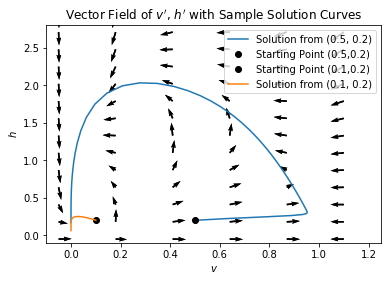

In [481]:
v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]

v0 = 0.5
h0 = 0.2
initial_conditions_3a=[v0, h0]

labels[2] = 'Vector Field of $v\'$, $h\'$ with a Sample Solution Curve Starting at ({0}, {1})'.format(initial_conditions_3a[0], initial_conditions_3a[1])
# integrator(dvdt, dhdt, v_interval, h_interval, initial_conditions)
flow(v_interval,
     h_interval,
     dvdt, dhdt,
     labels,
     xstep = 0.23, 
     ystep = 0.23,
     integrate = True,
     initial_conditions=initial_conditions_3a,
     soln_label = 'Solution from (0.5, 0.2)'
    )


initial_conditions_3b = [0.1, 0.2]
labels[2] = 'Vector Field of $v\'$, $h\'$ with Sample Solution Curves'.format(initial_conditions_3b[0], initial_conditions_3b[1])
plt.plot(initial_conditions_3a[0], initial_conditions_3a[1], 'o', color='black', label="Starting Point ({},{})".format(initial_conditions_3a[0], initial_conditions_3a[1]))
plt.plot(initial_conditions_3b[0], initial_conditions_3b[1], 'o', color='black', label="Starting Point ({},{})".format(initial_conditions_3b[0], initial_conditions_3b[1]))



flow(v_interval,
     h_interval,
     dvdt, dhdt,
     labels,
     xstep = 0.23, 
     ystep = 0.23,
     integrate = True,
     initial_conditions=initial_conditions_3b,
     soln_label = 'Solution from (0.1, 0.2)'
    )


**3.2**

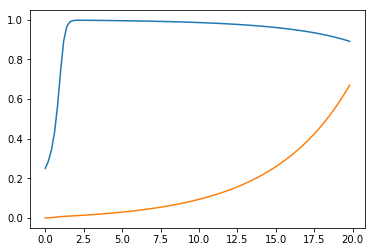

In [487]:
a = 0.15
k = 8
eps0 = 0.002
mu1 = 0.2
mu2 = 0.3
St = 0
use_st = True
T = 100

#Redefine dvdt to incorporate S(t)
def dvdt(v, h, t=0, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2, use_st = True, T = T):
    # set S(t) to false (0) for part 3.1, true to use snippet for 3.2
    St = 0
    if use_st:
        if T is None:
            raise ValueError("T must be set if S(t) is set")
        else:
            if t % T >= 10 and t % T <= 13:
                St = 0.25
    return -k*v*(v-a)*(v-1) - v*h + St
# plot_nullclines(vmin, vmax, 
#                 hmin, hmax, 
#                 v_nullclines,
#                 h_nullclines,
#                 colors,
#                 labels)

initial_conditions = [0.25, 0]
t_interval = [0, 500]

#integrate v(t), h(t), plot both against t in same figure
vt, ht, t = integrator(dvdt, dhdt, t_interval, initial_conditions)

plt.plot(t, vt)
plt.plot(t, ht)

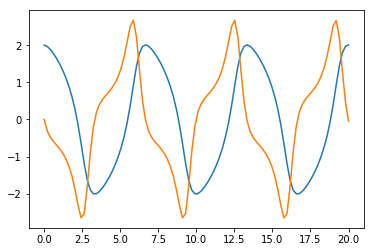

In [242]:
def vdp1(t, y):
    return np.array([y[1], (1 - y[0]**2)*y[1] - y[0]])
t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution
y0 = [2, 0]                   # initial value
y = np.zeros((len(t), len(y0)))   # array for solution
y[0, :] = y0
r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values
for i in range(1, t.size):
    y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")
plt.plot(t, y)
plt.show()

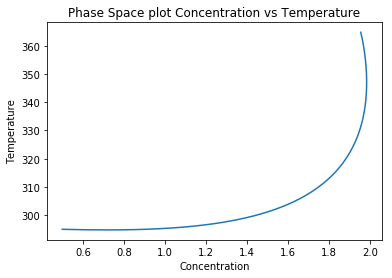

In [204]:
def tank(t, y):
    """
    Dynamic balance for a CSTR

    C_A = y[0] = the concentration of A in the tank, [mol/L]
    T   = y[1] = the tank temperature, [K]

    Returns dy/dt = [F/V*(C_{A,in} - C_A) - k*C_A^2       ]
                    [F/V*(T_in - T) - k*C_A^2*HR/(rho*Cp) ]
    """
    F = 20.1     # L/min
    CA_in = 2.5  # mol/L
    V = 100.0    # L
    k0 = 0.15    # L/(mol.min)
    Ea = 5000    # J/mol
    R = 8.314    # J/(mol.K)
    Hr = -590    # J/mol
    T_in = 288   # K
    rho = 1.050  # kg/L

    # Assign some variables for convenience of notation
    CA = y[0]
    T  = y[1]

    # Algebraic equations
    k = k0 * np.exp(-Ea/(R*T))  # L/(mol.min)
    Cp = 4.184 - 0.002*(T-273)  # J/(kg.K)

    # Output from ODE function must be a COLUMN vector, with n rows
    n = len(y)      # 2: implies we have two ODEs
    dydt = np.zeros((n,1))
    dydt[0] = F/V*(CA_in - CA) - k*CA**2
    dydt[1] = F/V*(T_in - T) - (Hr*k*CA**2)/(rho*Cp)
    return dydt

# The ``driver`` that will integrate the ODE(s):
if __name__ == '__main__':

    # Start by specifying the integrator:
    # use ``vode`` with "backward differentiation formula"
    r = integrate.ode(tank).set_integrator('vode', method='bdf')

    # Set the time range
    t_start = 0.0
    t_final = 45.0
    delta_t = 0.1
    # Number of time steps: 1 extra for initial condition
    num_steps = (np.floor((t_final - t_start)/delta_t) + 1).astype(np.int32)

    # Set initial condition(s): for integrating variable and time!
    CA_t_zero = 0.5
    T_t_zero = 295.0
    r.set_initial_value([CA_t_zero, T_t_zero], t_start)

    # Additional Python step: create vectors to store trajectories
    t = np.zeros((num_steps, 1))
    CA = np.zeros((num_steps, 1))
    temp = np.zeros((num_steps, 1))
    t[0] = t_start
    CA[0] = CA_t_zero
    temp[0] = T_t_zero

    # Integrate the ODE(s) across each delta_t timestep
    k = 1
    while r.successful() and k < num_steps:
        r.integrate(r.t + delta_t)

        # Store the results to plot later
        t[k] = r.t
        CA[k] = r.y[0]
        temp[k] = r.y[1]
        k += 1

    # All done!  Plot the trajectories in two separate plots:
#     fig = figure()
#     ax1 = subplot(211)
#     ax1.plot(t, CA)
#     ax1.set_xlim(t_start, t_final)
#     ax1.set_xlabel('Time [minutes]')
#     ax1.set_ylabel('Concentration [mol/L]')
#     ax1.grid('on')

#     ax2 = plt.subplot(212)
#     ax2.plot(t, temp, 'r')
#     ax2.set_xlim(t_start, t_final)
#     ax2.set_xlabel('Time [minutes]')
#     ax2.set_ylabel('Temperaturere [K]')
#     ax2.grid('on')
    #phase space single plot: 
    plt.plot(CA, temp)
    plt.xlabel("Concentration")
    plt.ylabel("Temperature")
    plt.title("Phase Space plot Concentration vs Temperature")
    
    fig.savefig('coupled-ode-Python.png')

In [ ]:
# for 3.2 number 1, use dv from before with flag st set to true